In [1]:
import pandas as pd
import numpy as np

In [ ]:
import spacy

!pip install --upgrade spacy
!python3 -m spacy download pl_core_news_md

nlp = spacy.load("pl_core_news_md")

Create a corpus of documents based on 5-10 books downloaded from the "Wolne Lektury" website: https://wolnelektury.pl/

In [3]:
books_links = (
    'https://wolnelektury.pl/media/book/txt/pan-tadeusz.txt',
    'https://wolnelektury.pl/media/book/txt/romeo-i-julia.txt',
    'https://wolnelektury.pl/media/book/txt/hamlet.txt',
    'https://wolnelektury.pl/media/book/txt/lalka-tom-pierwszy.txt',
    'https://wolnelektury.pl/media/book/txt/lalka-tom-drugi.txt'
)

In [4]:
import urllib.request

corpus = [urllib.request.urlopen(book_link).read().decode("utf8") 
          for book_link in books_links]

Visualize the frequency of tokens for each item. Only words constructed solely from letters were accepted as tokens

In [7]:
from collections import Counter

def get_tokens_frequency(corpus_fragment: str) -> Counter:
  #tokens = list(filter(lambda x: x.text.isalpha(), nlp(corpus_fragment)))
  tokens = [word.text.lower() for word in nlp(corpus_fragment) if word.text.isalpha()]
  #tokens = [word.lemma_.lower() for word in nlp(corpus_fragment) if word.text.isalpha()]  # lemma
  return Counter(tokens)

corpus_tokens_frequency = {link[39:-4]: get_tokens_frequency(corpus[i]) 
                          for i, link in enumerate(books_links)}

In [6]:
for link, tokens_frequency in corpus_tokens_frequency.items():
  print("{} -> {}".format(link, tokens_frequency))

pan-tadeusz -> Counter({'i': 2134, 'w': 1699, 'się': 1498, 'z': 1389, 'na': 1309, 'nie': 938, 'jak': 579, 'do': 566, 'a': 565, 'że': 555, 'to': 531, 'o': 350, 'za': 335, 'po': 323, 'już': 313, 'tak': 312, 'co': 289, 'od': 236, 'lecz': 206, 'bo': 196, 'gdy': 189, 'ja': 188, 'pan': 181, 'jest': 179, 'ale': 176, 'był': 165, 'nim': 157, 'rzekł': 155, 'go': 153, 'tylko': 149, 'jako': 145, 'mnie': 144, 'mu': 144, 'tu': 142, 'on': 141, 'czy': 136, 'ten': 132, 'hrabia': 129, 'sędzia': 127, 'tam': 125, 'pod': 122, 'aż': 118, 'dla': 118, 'u': 117, 'nad': 112, 'więc': 112, 'ich': 110, 'tym': 107, 'tadeusz': 106, 'przed': 102, 'sam': 101, 'jeszcze': 101, 'przy': 100, 'przez': 99, 'ze': 99, 'bez': 95, 'gdzie': 94, 'kto': 93, 'jej': 93, 'ku': 90, 'wszyscy': 90, 'wojski': 89, 'było': 88, 'choć': 88, 'potem': 86, 'miał': 84, 'mi': 84, 'teraz': 83, 'dziś': 80, 'jego': 80, 'by': 79, 'ją': 79, 'oczy': 78, 'domu': 76, 'niech': 76, 'może': 75, 'kiedy': 74, 'ma': 73, 'jeśli': 73, 'który': 72, 'nas': 71, 'na

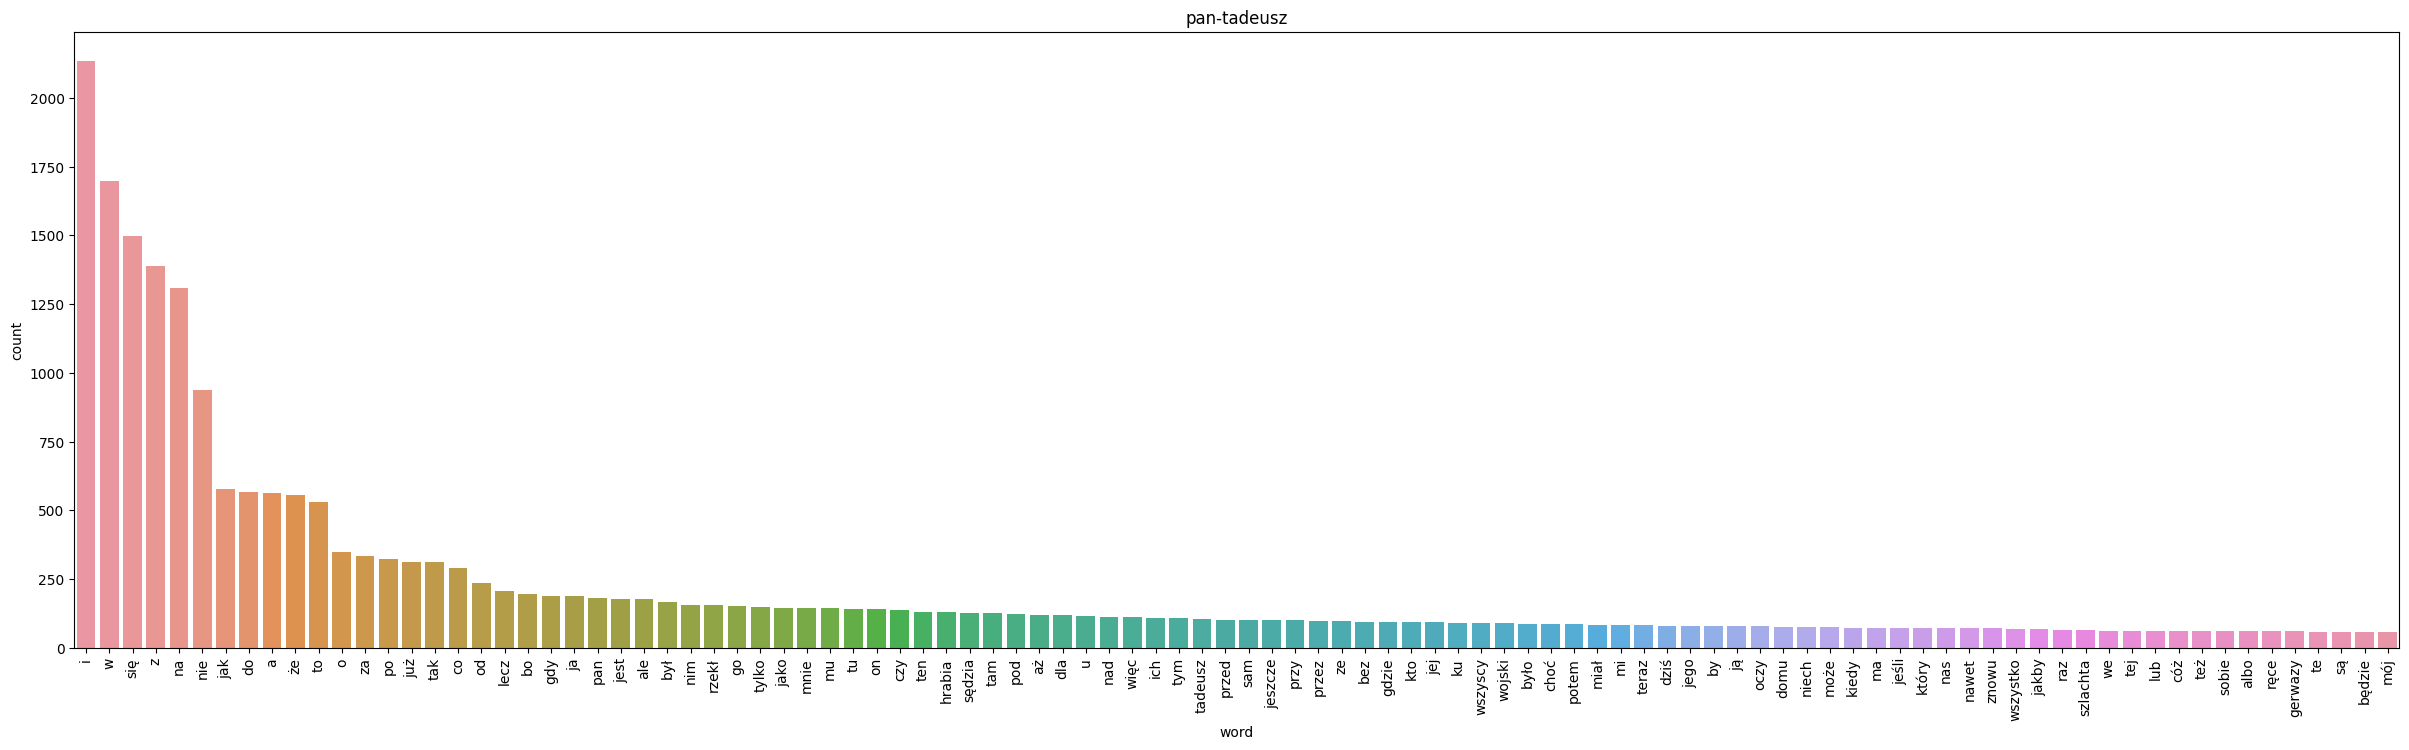

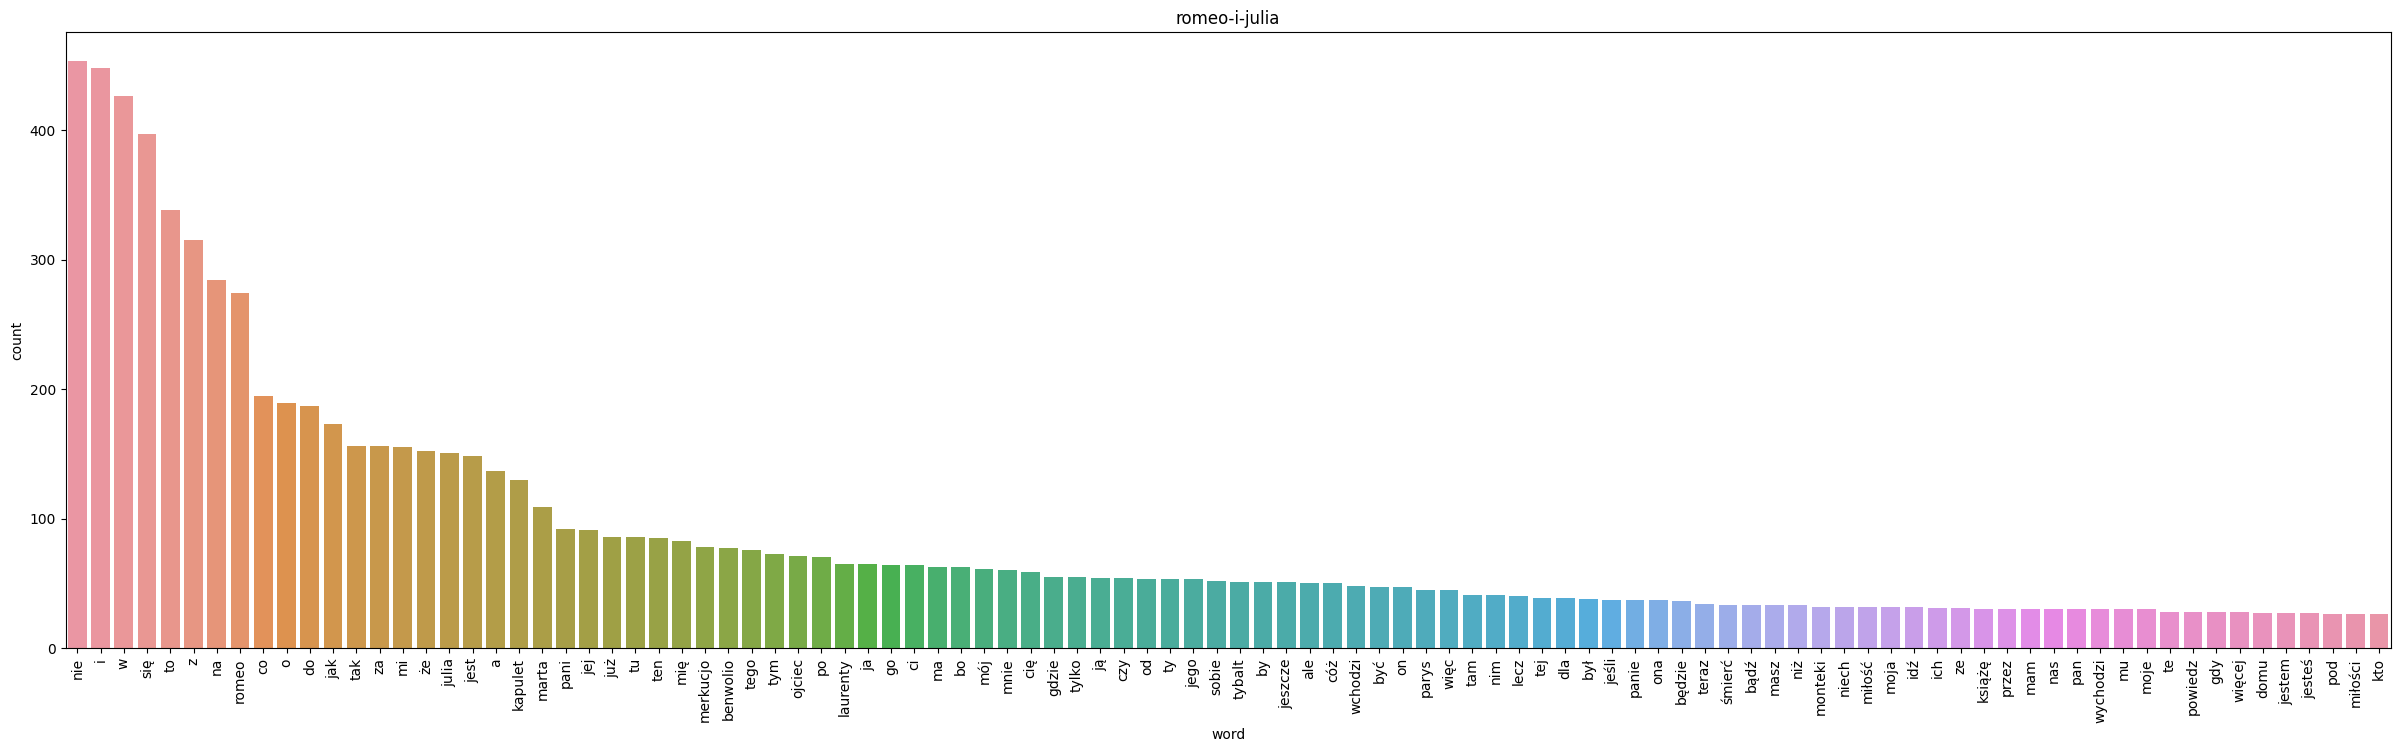

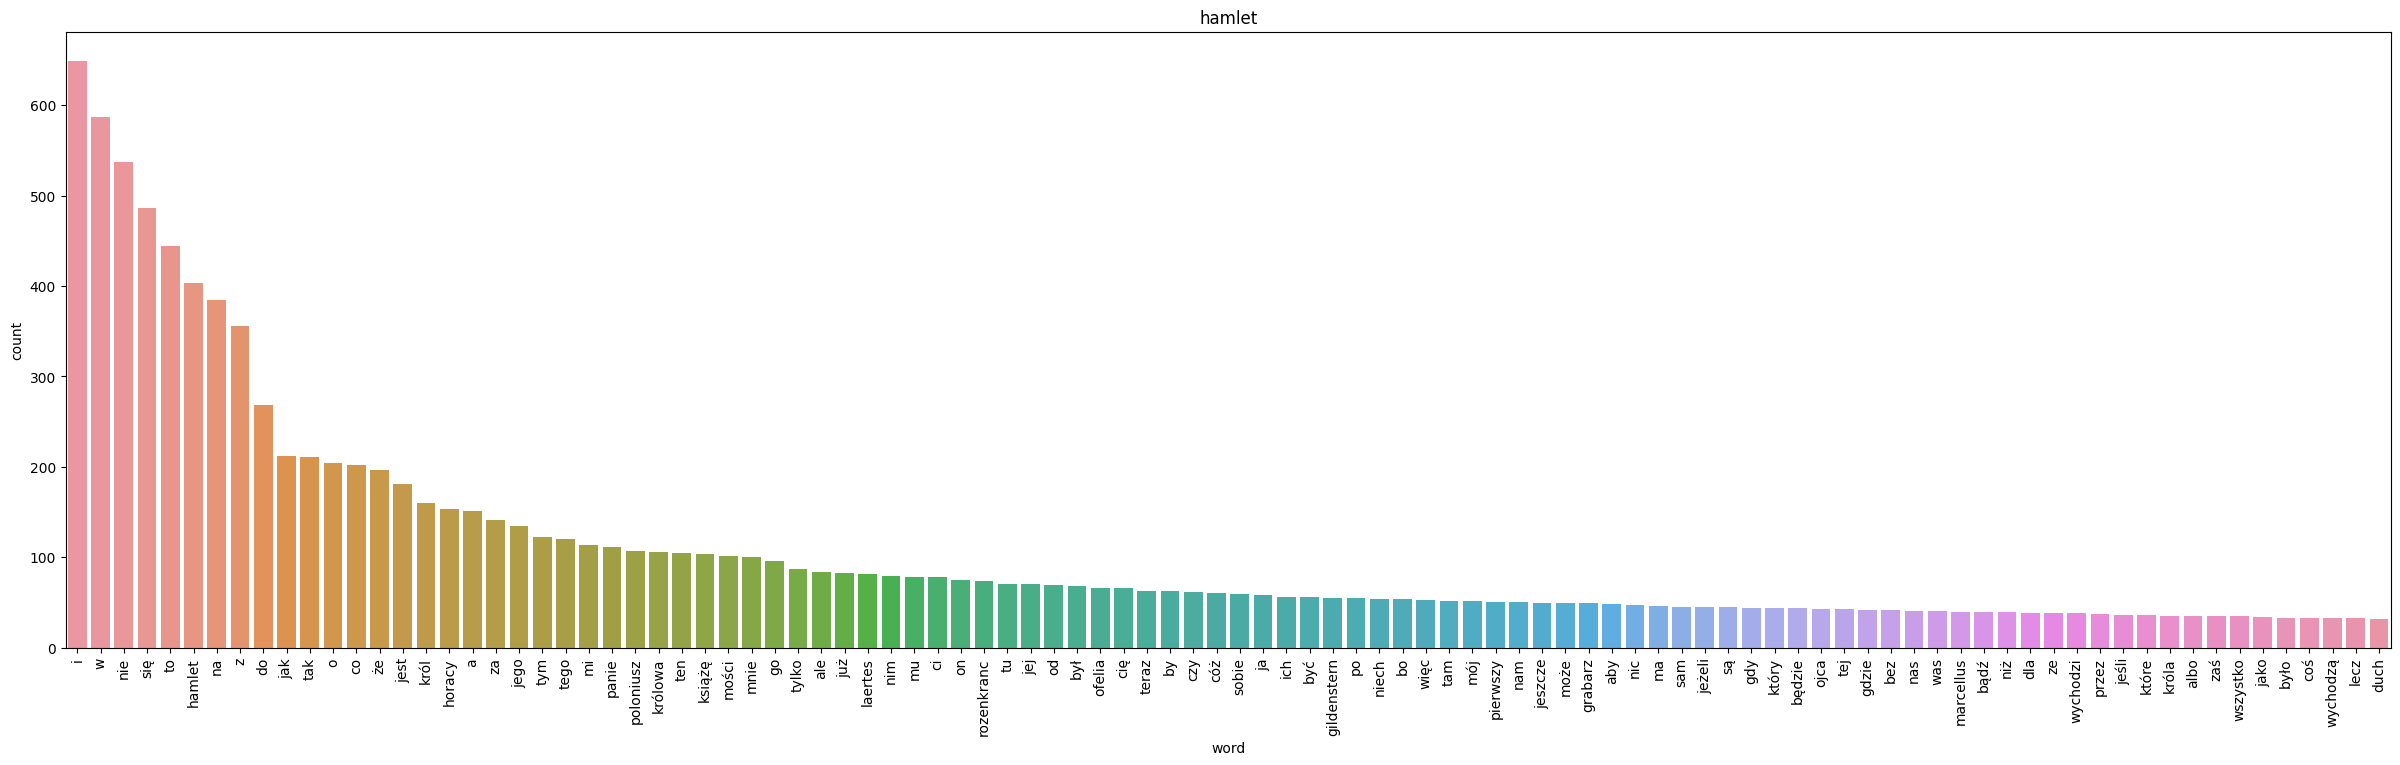

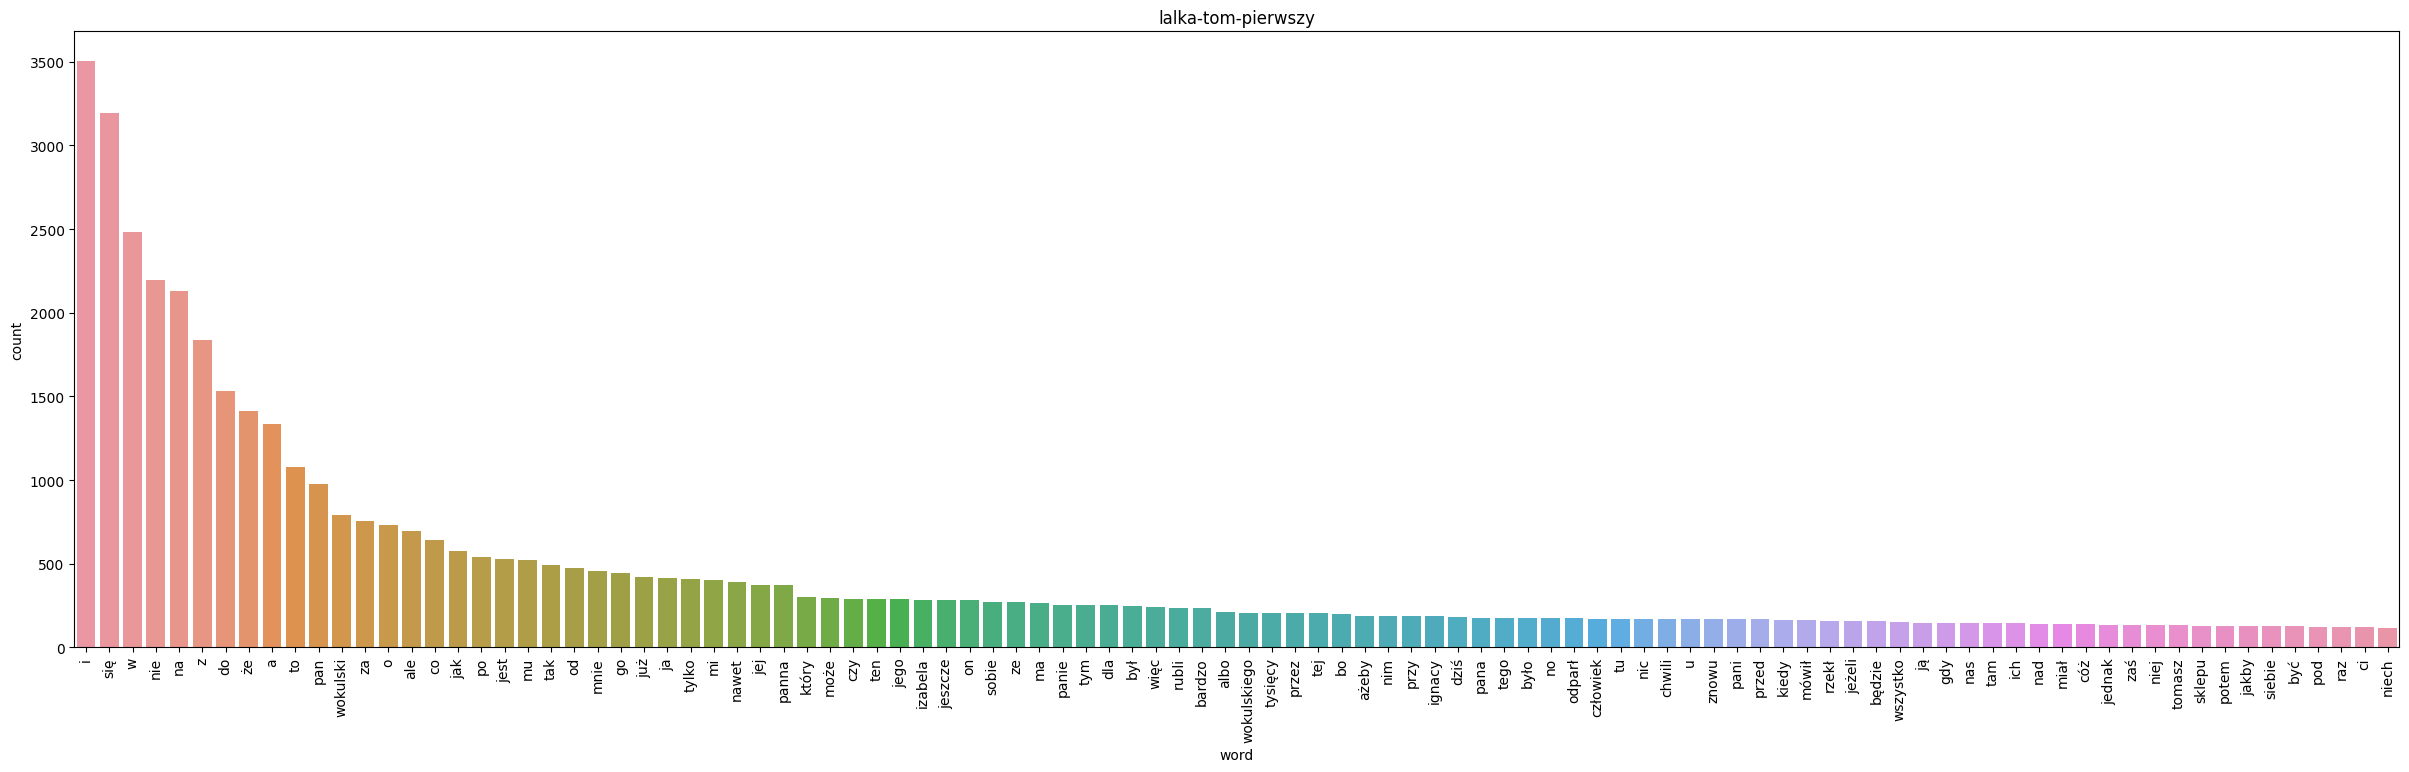

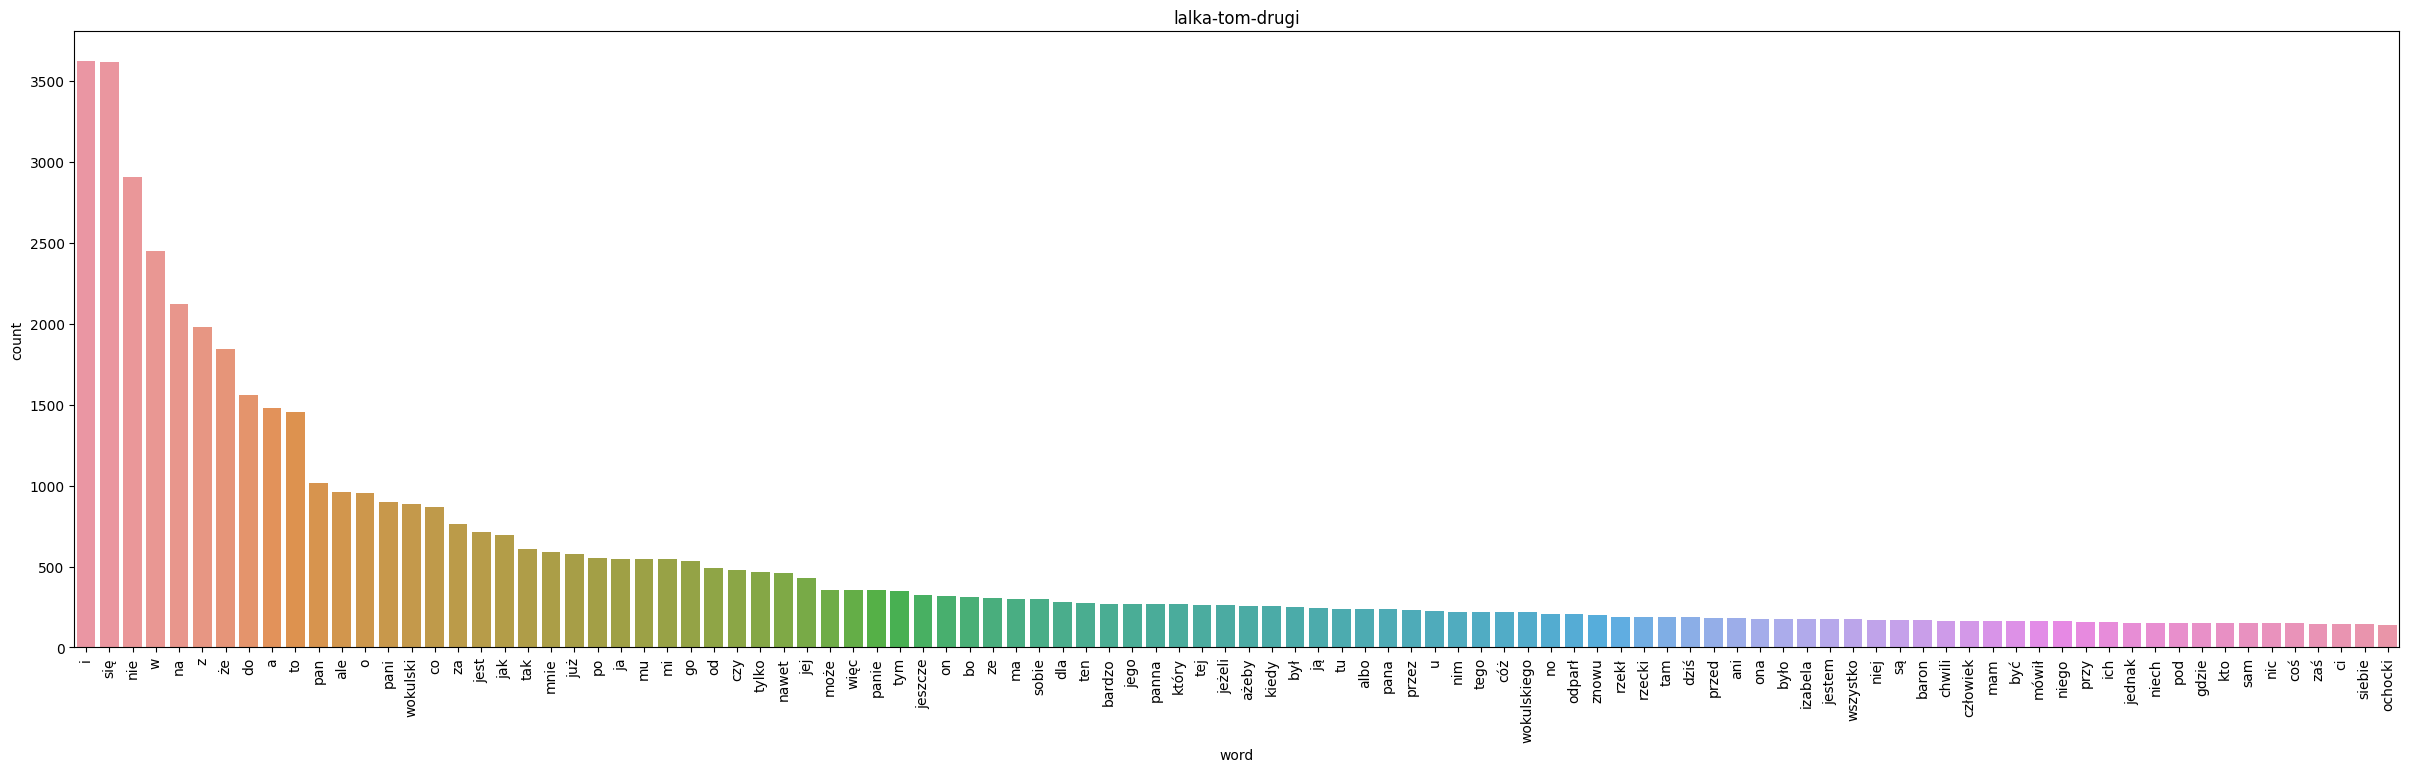

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

for link, tokens_frequency in corpus_tokens_frequency.items():
  df = pd.DataFrame(tokens_frequency.most_common(), columns=['word', 'count'])
  fig, ax = plt.subplots(figsize=(30, 8))
  sns.barplot(data=df[:100], x='word', y='count').set(title=str(link))
  ax.tick_params(axis='x', rotation=90)

It can be seen that the most frequent words in the documents are "stopwords", having a low rank in the language corpus. This is in accordance with Zipf's law.

The use of stoplists for the Polish language

In [23]:
def get_tokens_frequency_without_stopwords(corpus_fragment: str) -> Counter:
  stopwords = (urllib.request.urlopen('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').read().decode("utf8")).split('\n')
  tokens = [word.text.lower() for word in nlp(corpus_fragment) if word.text.isalpha() and word.text.lower() not in stopwords]
  return Counter(tokens)

corpus_tokens_frequency_without_stopwords = {link[39:-4]: get_tokens_frequency_without_stopwords(corpus[i]) 
                                            for i, link in enumerate(books_links)}

In [24]:
for link, tokens_frequency in corpus_tokens_frequency_without_stopwords.items():
  print("{} -> {}".format(link, tokens_frequency))

pan-tadeusz -> Counter({'rzekł': 155, 'hrabia': 129, 'sędzia': 127, 'tadeusz': 106, 'wojski': 89, 'choć': 88, 'potem': 86, 'miał': 84, 'oczy': 78, 'domu': 76, 'raz': 65, 'szlachta': 64, 'cóż': 62, 'ręce': 60, 'gerwazy': 60, 'głowy': 56, 'telimena': 56, 'tadeusza': 54, 'razem': 54, 'panie': 54, 'głowę': 53, 'ziemi': 51, 'robak': 51, 'ręką': 51, 'klucznik': 51, 'podkomorzy': 48, 'zamku': 48, 'widać': 46, 'rękę': 46, 'rzecz': 46, 'siebie': 46, 'krzyknął': 46, 'zaraz': 45, 'tymczasem': 45, 'wtem': 45, 'ledwie': 45, 'ni': 45, 'nikt': 42, 'wielki': 42, 'długo': 41, 'czas': 41, 'coraz': 41, 'chciał': 40, 'zaś': 40, 'tyle': 40, 'ksiądz': 40, 'ryków': 40, 'dotąd': 40, 'sędziego': 39, 'strony': 39, 'drzwi': 38, 'gości': 38, 'bóg': 38, 'wtenczas': 37, 'ów': 37, 'niby': 37, 'góry': 37, 'szlachty': 37, 'litwie': 36, 'stał': 36, 'stąd': 36, 'pierwszy': 36, 'wkoło': 35, 'serce': 35, 'wnet': 35, 'asesor': 35, 'dwóch': 35, 'przerwał': 34, 'prawda': 34, 'zosia': 34, 'śród': 33, 'okiem': 33, 'stary': 33,

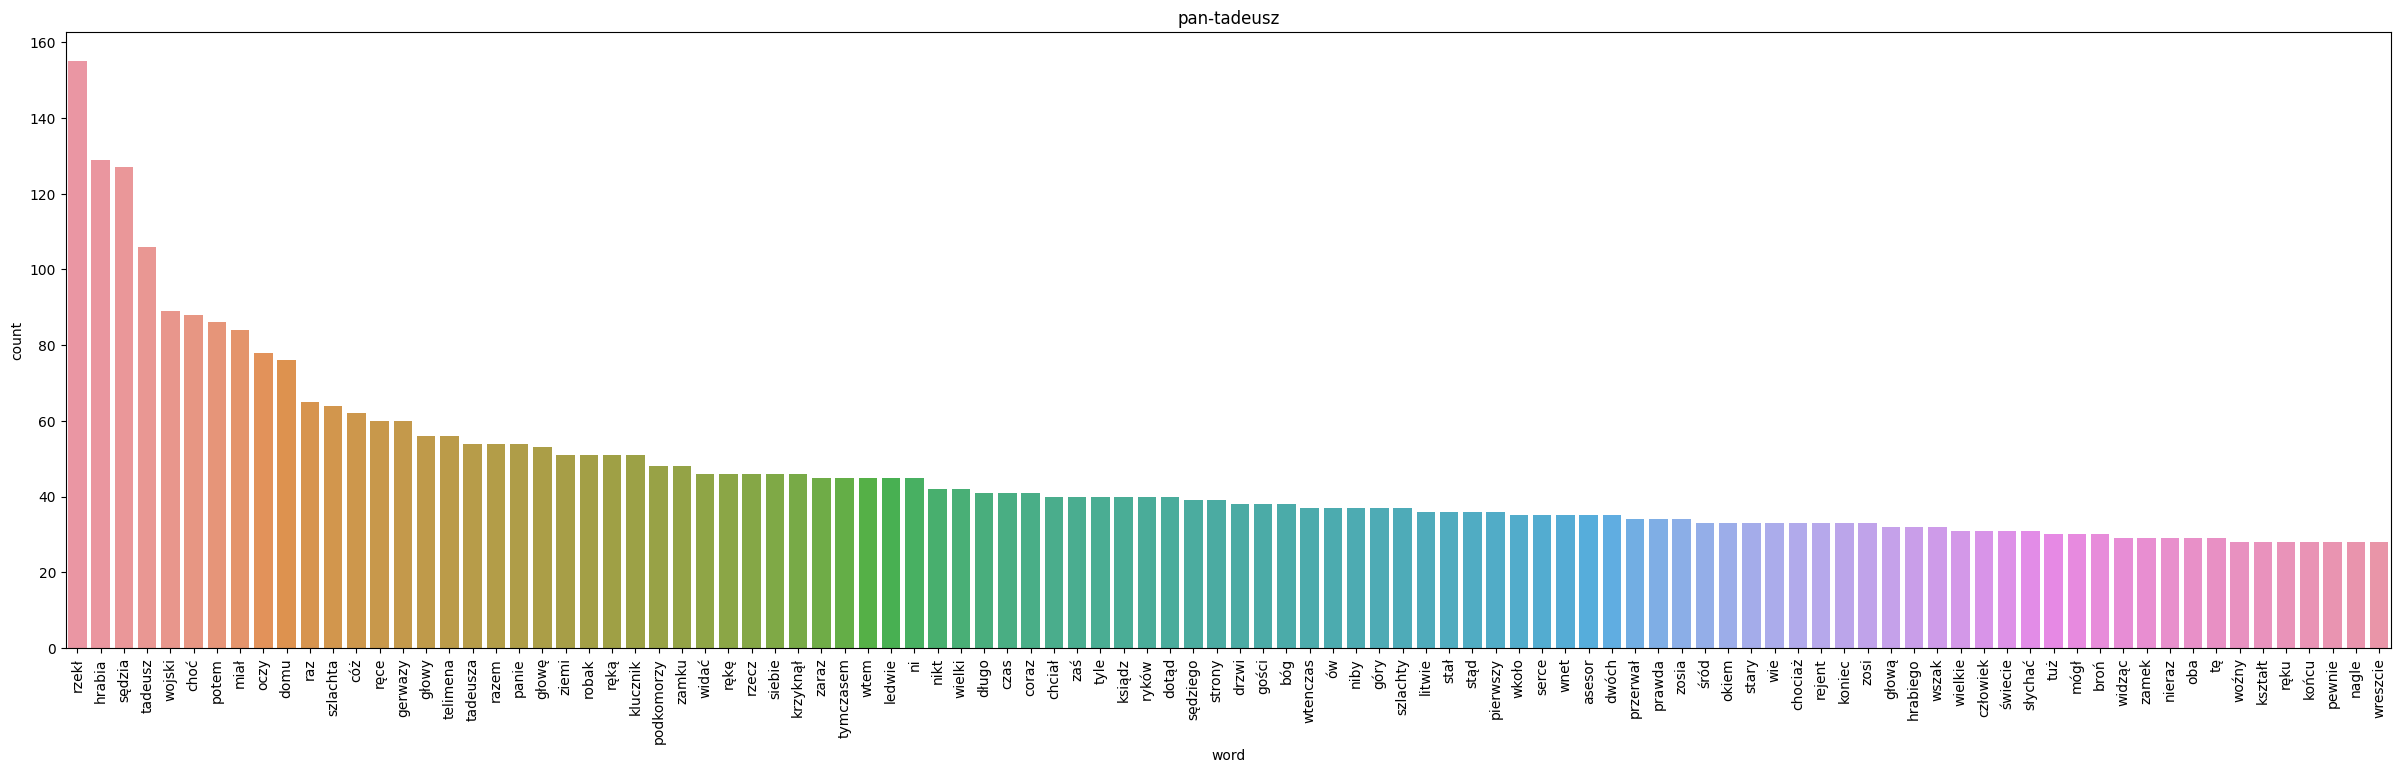

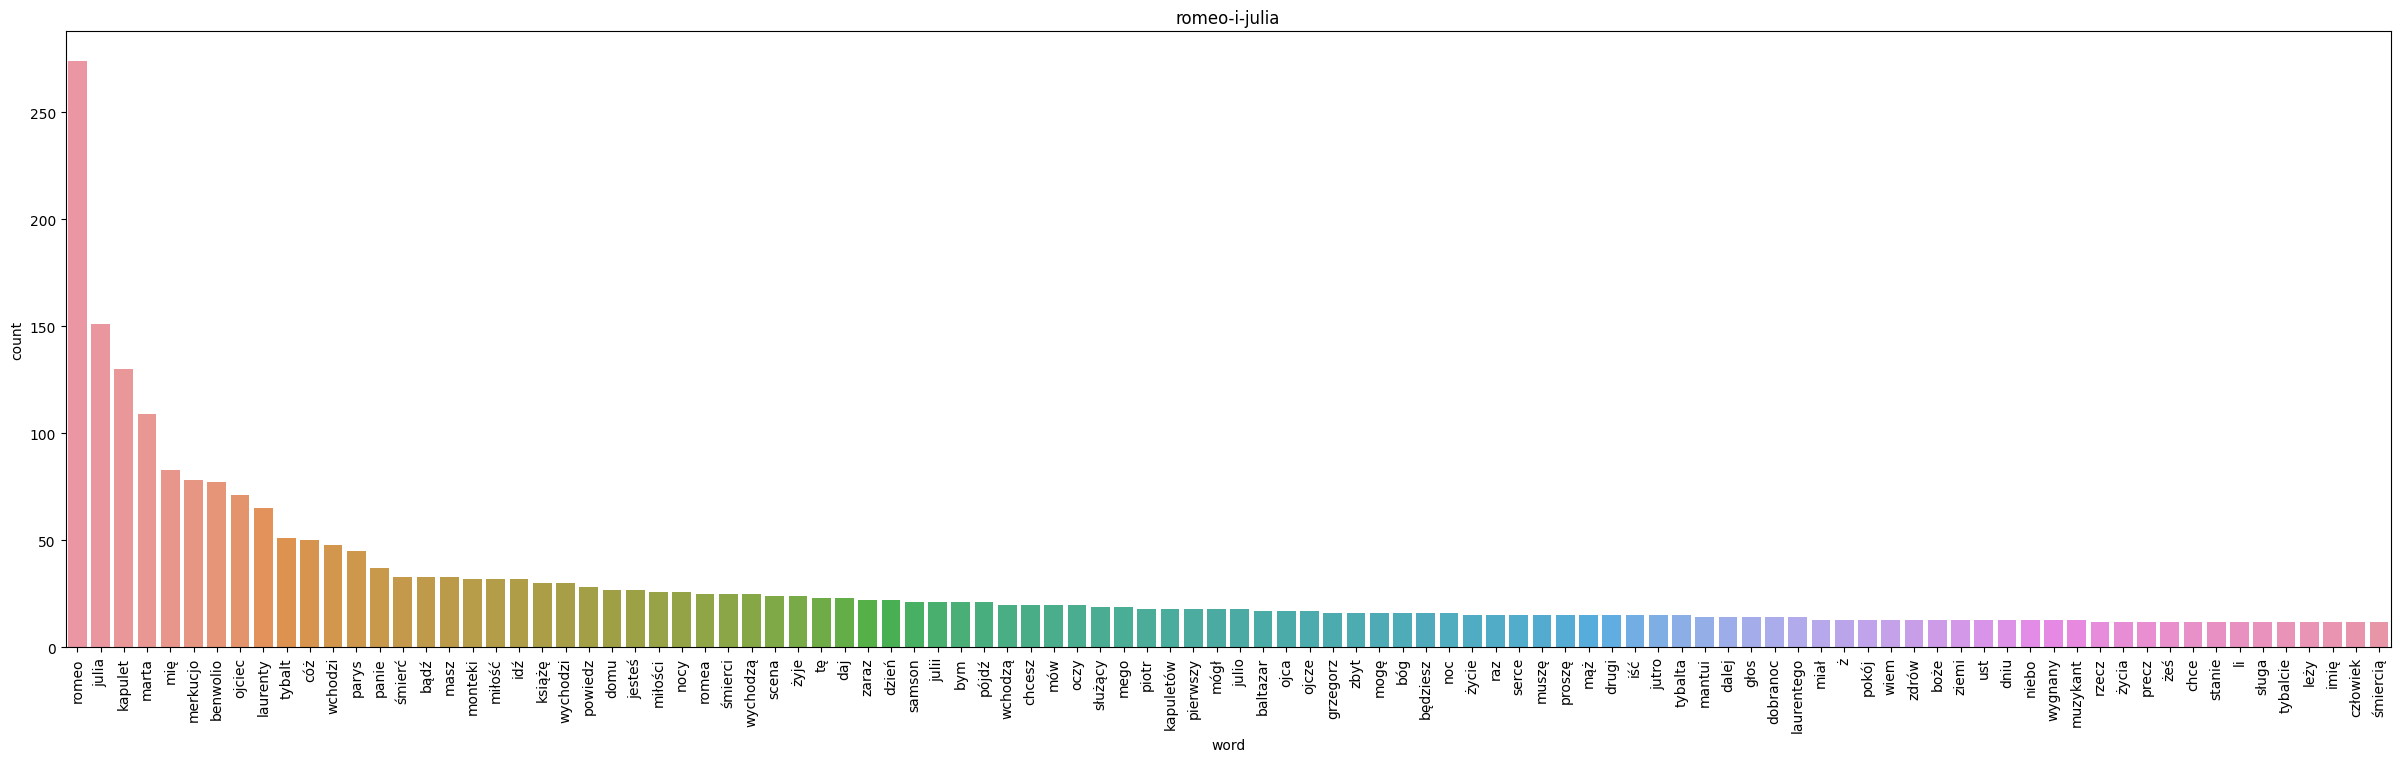

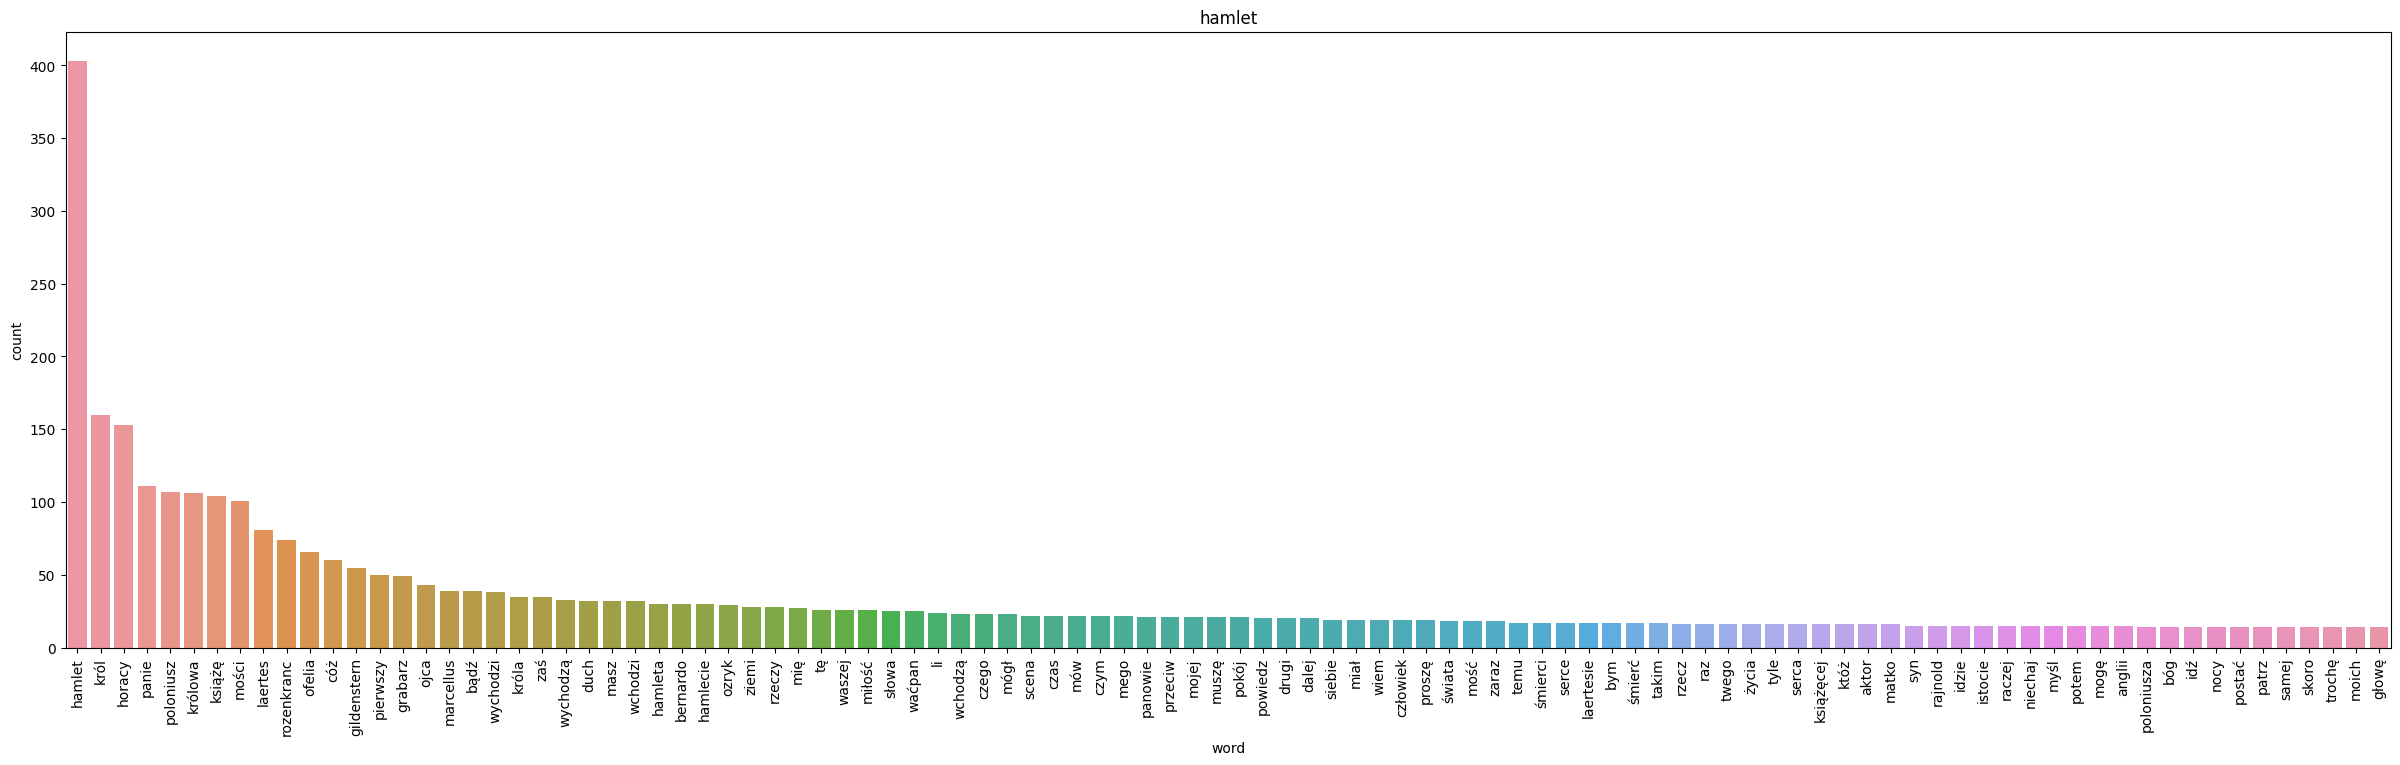

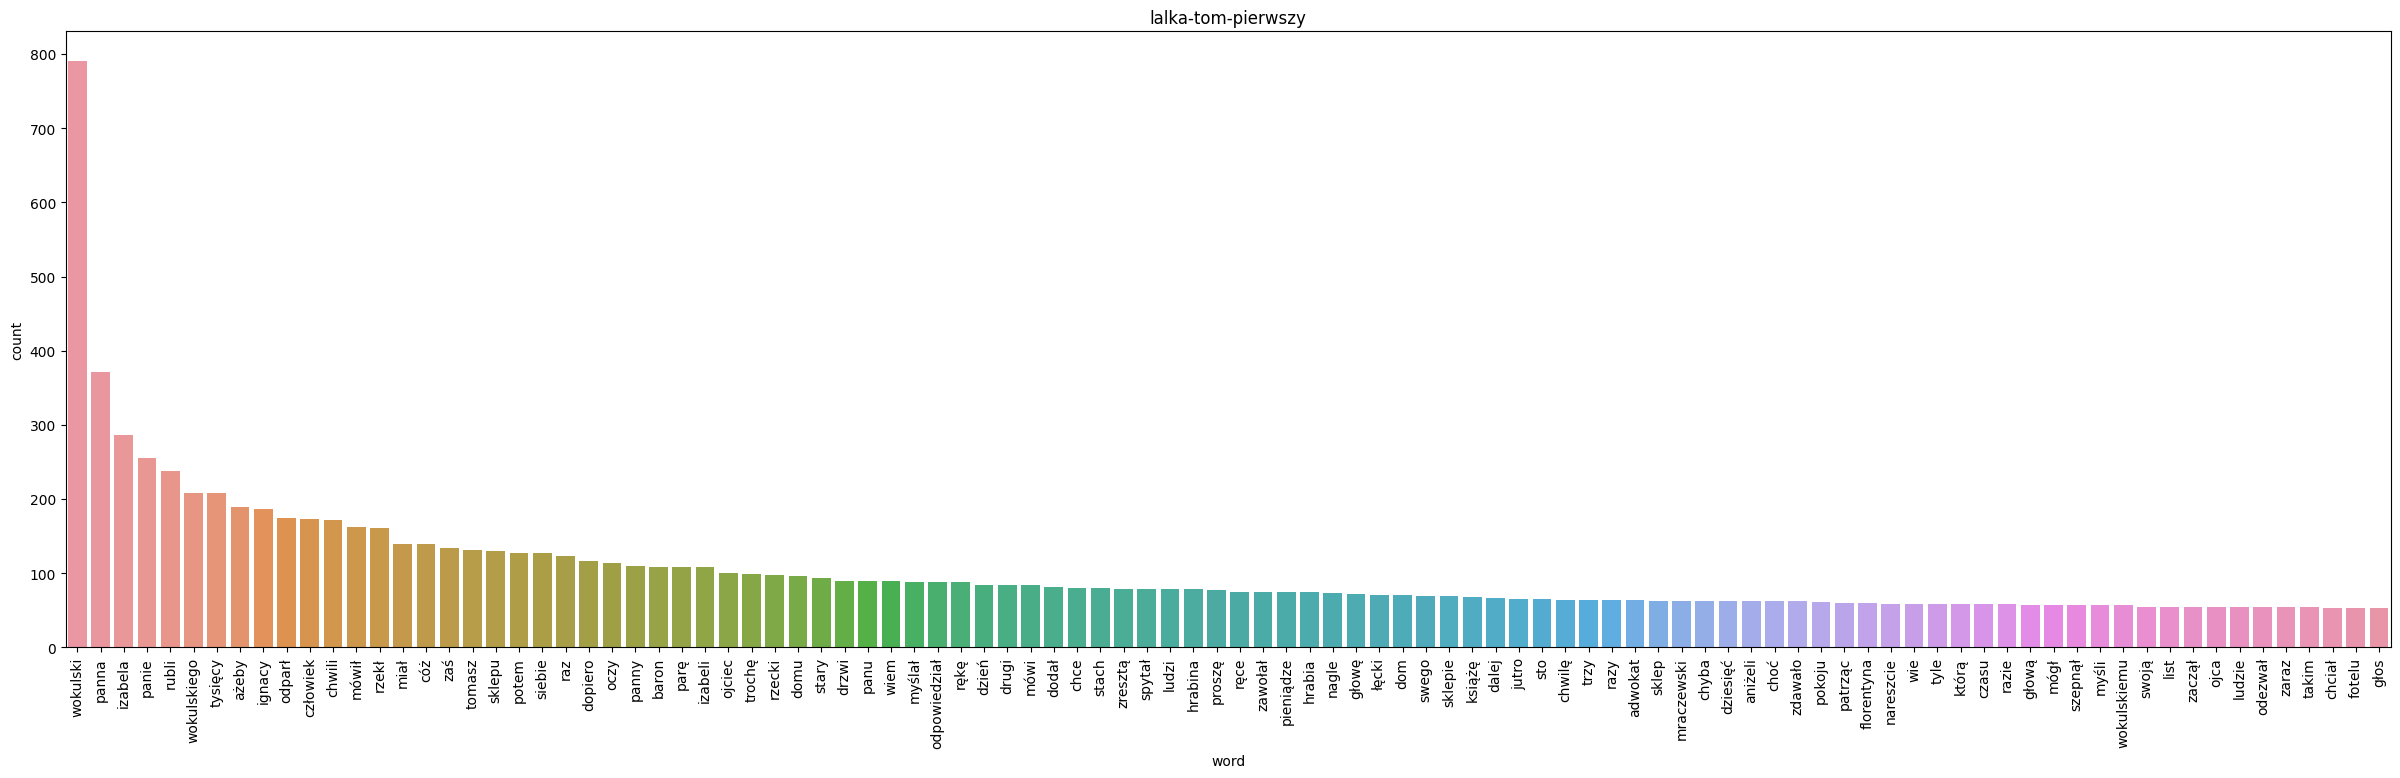

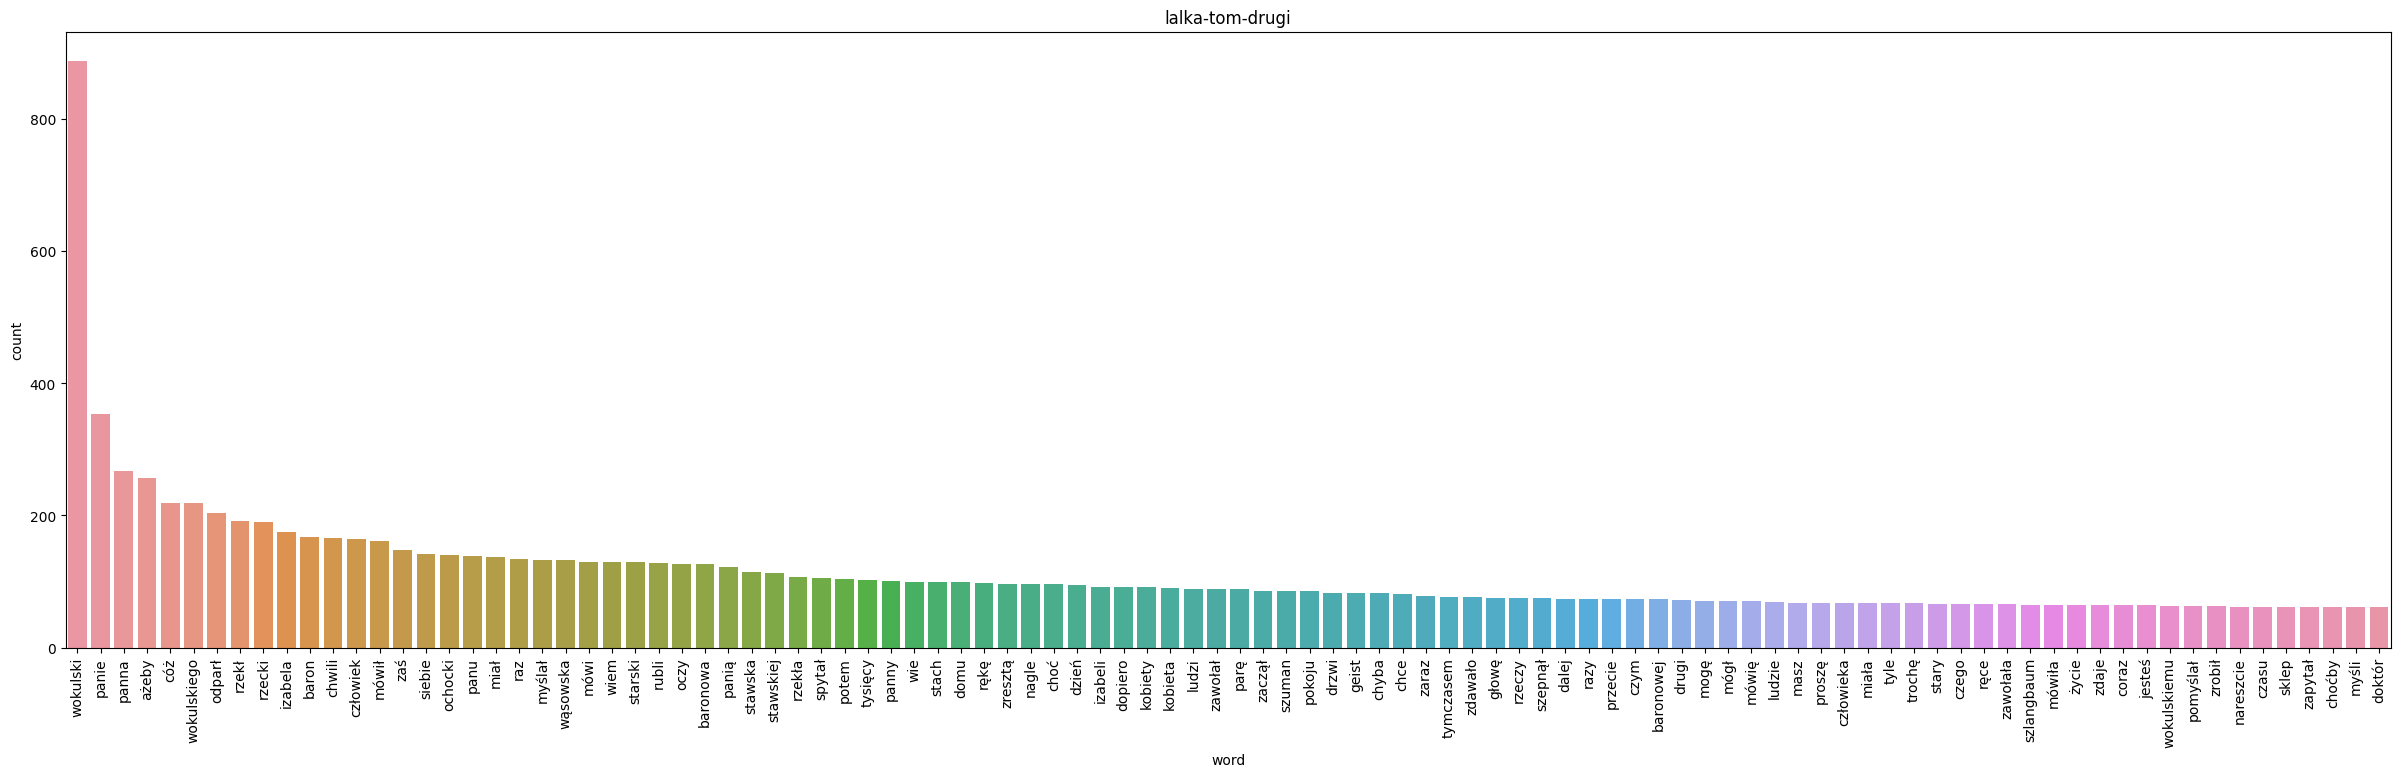

In [25]:
for link, tokens_frequency in corpus_tokens_frequency_without_stopwords.items():
  df = pd.DataFrame(tokens_frequency.most_common(), columns=['word', 'count'])
  fig, ax = plt.subplots(figsize=(30, 8))
  sns.barplot(data=df[:100], x='word', y='count').set(title=str(link))
  ax.tick_params(axis='x', rotation=90)

Building a TF-IDF matrix (excluding stopwords)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenize(corpus_fragment: str) -> list:
  stopwords = (urllib.request.urlopen('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').read().decode("utf8")).split('\n')
  return [word.text.lower() for word in nlp(corpus_fragment) if word.text.isalpha() and word.text.lower() not in stopwords]

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize)
fit_transform = tfidf_vectorizer.fit_transform(corpus)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [30]:
tfidf = pd.DataFrame(data = fit_transform.toarray(), index=books_links, 
                            columns=tfidf_vectorizer.get_feature_names_out())
tfidf

,aaa,abecadła,abecadło,aber,abraham,abrahama,absolucją,absolutnemu,absolutnie,absolutną,...,żądzach,żądzy,żądzą,żądzę,żądłem,żądło,żęciem,żłobem,żłoby,żłób
https://wolnelektury.pl/media/book/txt/pan-tadeusz.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002195,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004389,0.004389,0.002195,0.002195,0.000000,0.000000
https://wolnelektury.pl/media/book/txt/romeo-i-julia.txt,0.000000,0.002179,0.000000,0.000000,0.018907,0.002701,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
https://wolnelektury.pl/media/book/txt/hamlet.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001916,0.000000,0.001916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001546
https://wolnelektury.pl/media/book/txt/lalka-tom-pierwszy.txt,0.000777,0.000000,0.000000,0.001925,0.000000,0.000000,0.000000,0.000000,0.001553,0.000963,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000777
https://wolnelektury.pl/media/book/txt/lalka-tom-drugi.txt,0.007145,0.000715,0.000886,0.000000,0.000000,0.000000,0.000000,0.000886,0.001429,0.000000,...,0.000000,0.000000,0.000000,0.001771,0.000000,0.000000,0.000000,0.000000,0.000886,0.000000


Document distance matrix built based on cosine similarity

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(tokenizer=tokenize).fit_transform(corpus)
cosine_sim = pd.DataFrame(np.matrix(cosine_similarity(count_vectorizer)))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
cosine_sim

,0,1,2,3,4
0,1.000000,0.221428,0.216718,0.400374,0.404075
1,0.221428,1.000000,0.201557,0.190908,0.190992
2,0.216718,0.201557,1.000000,0.194123,0.209324
3,0.400374,0.190908,0.194123,1.000000,0.897236
4,0.404075,0.190992,0.209324,0.897236,1.000000


Reduce the dimensionality of the TF-IDF matrix to 2 dimensions and visualize the position of documents in the coordinate system

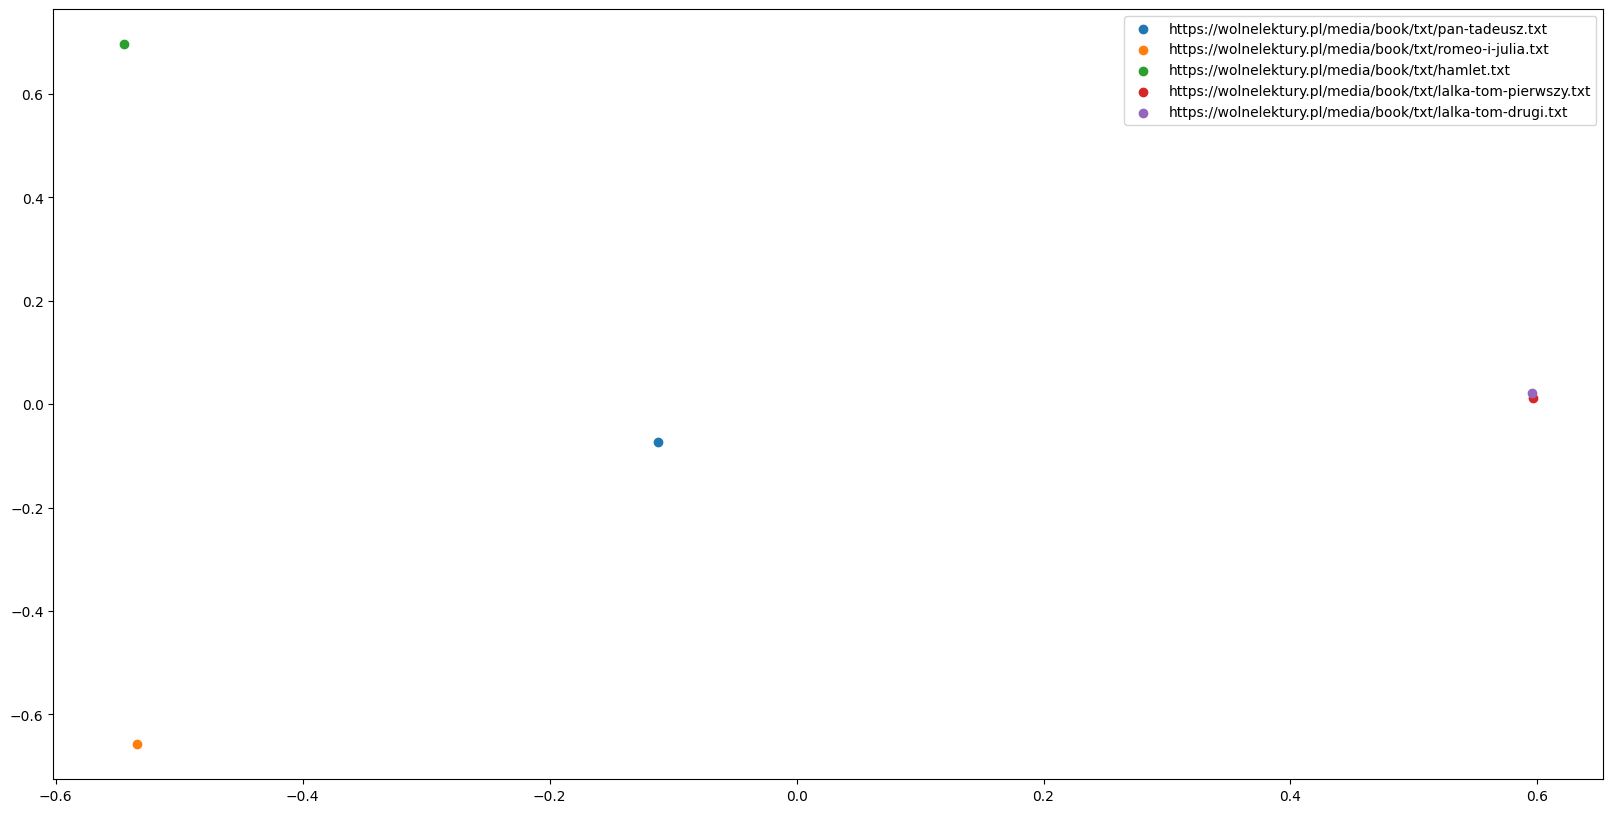

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(np.asarray(fit_transform.todense()))

fig = plt.gcf()
for i in range(len(books_links)):
  plt.scatter(pca[i][0], pca[i][1], label=books_links[i])
plt.legend()
fig.set_size_inches(20, 10)
plt.show()

Zad 7. Skomentować spójność wyników z punktu 5 i 6. Które dokumenty są do siebie bardziej podobne w obydwu wariantach?

Zarówno macierz podobieństw cosinusowych jak i wizualizacja położenia dokumentów w układzie współrzędnych wskazuje duże podobieństwo dwóch tomów Lalki. Na wykresie znacznie dalej od dwóch wystąpień Lalki znajdują się Romeo i Julia oraz Hamlet, niż Pan Tadeusz. Tak samo z podobieństwem cosinusowym (Romeo i Julia + Hamlet, a Lalka - ~0,4, natomiast Pan Tadeusz, a Lalka - ~0,6. Świadczy to o spójności wyników.  